In [2]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


## Data Import

In [42]:
new = pd.read_csv(r"C:\Users\omc\Desktop\Python\Machine Learning\Class Assessment\Linear Regression using Python\Fish_dataset.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'
new

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [43]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [44]:
new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [45]:
new = new[(new != 0).all(1)]

In [46]:
new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Bar Chart showing count of individual species

Text(0, 0.5, 'Count of Species')

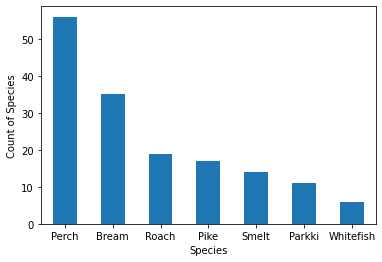

In [47]:
new['Species'].value_counts().plot.bar(rot=0)
plt.xlabel('Species')
plt.ylabel('Count of Species')

## EDA
* Identify and Treatment of Outliers

<AxesSubplot:>

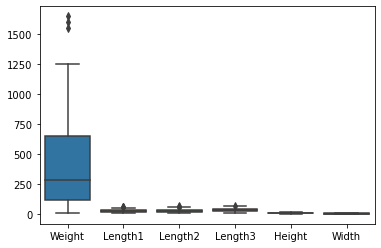

In [48]:
sns.boxplot(data=new)

In [49]:
new1 = new.drop('Species', axis= 1)

In [50]:
new1.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

## Outliers Treatment - Winzorising

In [51]:
def outliers_treatment(df):
    for i in df.columns:
        q1=new1[i].quantile(0.25)
        q3=new1[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((new1[i].dtype=='float64') | (new1[i].dtype=='int64')):
            new1[i][new1[i]<=lower_limit]=lower_limit
            new1[i][new1[i]>=upper_limit]=upper_limit
        else:
            new1[i]=new1[i]
    return new1
    
outliers_treatment(new1)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

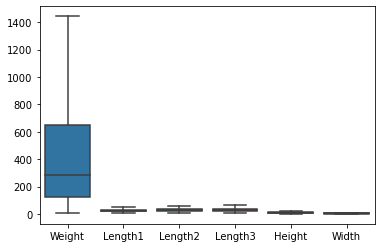

In [52]:
sns.boxplot(data=new1)

In [53]:
new1.isna().sum()  # no missing data

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

C:\Users\omc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

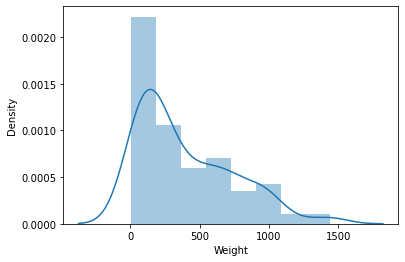

In [54]:
sns.distplot(new1.Weight)

### Weight Data is positive skewed, hence we need to do sqrt transformation treatment

C:\Users\omc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

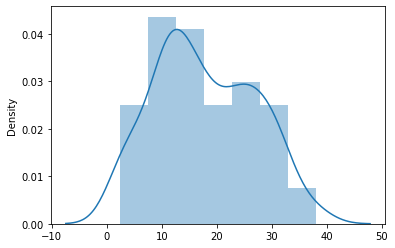

In [55]:
sns.distplot(np.sqrt(new1[['Weight']]))

## Splitting the Data in Train and Test Set

In [56]:
new1.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [57]:
# Putting feature variable to X
X = new1.drop('Weight', axis= 1)

# Putting response variable to y
y = np.sqrt(new1[['Weight']])

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=122)

In [58]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
46,11.832160,21.0,22.5,25.0,6.5500,3.3250
17,26.457513,30.4,33.0,38.5,14.9380,5.1975
153,3.130495,11.4,12.0,13.2,2.2044,1.1484
130,17.320508,32.7,35.0,38.8,5.9364,4.3844
35,6.324555,12.9,14.1,16.2,4.1472,2.2680


## Correlation Matrix

In [59]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.937397,0.942520,0.954283,0.812496,0.953410
Length1,0.937397,1.000000,0.999487,0.992050,0.621629,0.867261
Length2,0.942520,0.999487,1.000000,0.994225,0.634965,0.872382
Length3,0.954283,0.992050,0.994225,1.000000,0.693006,0.875206
Height,0.812496,0.621629,0.634965,0.693006,1.000000,0.798947
Width,0.953410,0.867261,0.872382,0.875206,0.798947,1.000000


<AxesSubplot:>

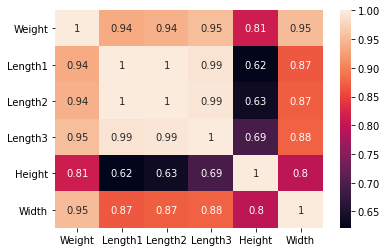

In [60]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'Weight vs Length1,Length2,Length3'}, xlabel='Length1', ylabel='Weight'>

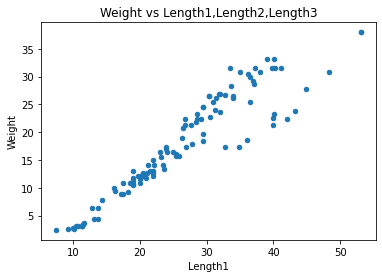

In [61]:
df.plot.scatter(x='Length1', y='Weight', title='Weight vs Length1,Length2,Length3')

#### Length1, Length2, Length3 and Width 95% have strong positve correlation with Weight

* All Variables have high impact on Weight
* There is Multi-colinearity in data 

## Multicolinearity (with help of VIF)

In [62]:
X1=df.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    11109.739833
Length2    16091.732306
Length3     2842.882635
Height        60.940345
Width         96.128225
dtype: float64


* There is Multicolinearity

## Model Building

* H0 :- There is no Linear relationship between Weight and other variables

Vs 

* H1 :- There is Linear relationship between Weight and other variables

Alpha = 0.05 (5%)

In [63]:
import statsmodels.formula.api as smf
model = smf.ols('Weight ~ Length1 + Length2 + Length3 + Height + Width',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     959.4
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.77e-85
Time:                        17:59:31   Log-Likelihood:                -186.50
No. Observations:                 110   AIC:                             385.0
Df Residuals:                     104   BIC:                             401.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5222      0.378    -17.252      0.000      -7.272      -5.773
Length1       -0.1756      0.484     -0.362      0.718      -1.136       0.785
Length2        0.4618      0.540      0.856      0.394      -0.609       1.532
Length3        0.1323      0.207      0.638      0.525      -0.279       0.544
Height         0.4212      0.102      4.147      0.000       0.220       0.623
Width          1.7934      0.272      6.588      0.000       1.254       2.333
==============================================================================
Omnibus:                        8.102   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               10.223
Skew:                           0.392   Prob(JB):                      0.00603
Kurtosis:                       4.271   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
import statsmodels.formula.api as smf
model2 = smf.ols('Weight ~ Length2 + Length3 + Height + Width',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1209.
Date:                Tue, 24 May 2022   Prob (F-statistic):           7.97e-87
Time:                        18:00:26   Log-Likelihood:                -186.57
No. Observations:                 110   AIC:                             383.1
Df Residuals:                     105   BIC:                             396.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5246      0.376    -17.332      0.000      -7.271      -5.778
Length2        0.2841      0.225      1.265      0.209      -0.161       0.730
Length3        0.1443      0.204      0.708      0.481      -0.260       0.548
Height         0.4258      0.100      4.244      0.000       0.227       0.625
Width          1.7988      0.271      6.646      0.000       1.262       2.336
==============================================================================
Omnibus:                        8.814   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               11.886
Skew:                           0.400   Prob(JB):                      0.00262
Kurtosis:                       4.398   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
import statsmodels.formula.api as smf
model3 = smf.ols('Weight ~ Length2 + Height',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1479.
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.10e-78
Time:                        18:02:26   Log-Likelihood:                -213.87
No. Observations:                 110   AIC:                             433.7
Df Residuals:                     107   BIC:                             441.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1848      0.472    -13.094      0.000      -7.121      -5.248
Length2        0.6038      0.020     30.576      0.000       0.565       0.643
Height         0.7587      0.049     15.340      0.000       0.661       0.857
==============================================================================
Omnibus:                        3.724   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                4.369
Skew:                          -0.012   Prob(JB):                        0.113
Kurtosis:                       3.976   Cond. No.                         92.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X1=df.loc[:,['Length2', 'Height']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Length2    8.76018
Height     8.76018
dtype: float64

* There is Linear relationship between Weight and Length2, Height
* 96% is accuracy of model , so we say model is good fit 
* Y = -6.1848 + 0.6038 * Length2 + 0.7587 * Height 

## Assumption of Model

In [70]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width
46,11.832160,21.0,22.5,25.0,6.5500,3.3250
17,26.457513,30.4,33.0,38.5,14.9380,5.1975
153,3.130495,11.4,12.0,13.2,2.2044,1.1484
130,17.320508,32.7,35.0,38.8,5.9364,4.3844
35,6.324555,12.9,14.1,16.2,4.1472,2.2680


In [71]:
# Y = intercept + b1 * Length2 + b2 * Height
Y = -6.1848 + 0.6038 * 22.5 + 0.7587 * 6.55
Y

12.370185

In [72]:
df['fitted_value']=model3.fittedvalues #Predicted Value
df['residual']=model3.resid  #Error
df.head()

,Weight,Length1,Length2,Length3,Height,Width,fitted_value,residual
46,11.832160,21.0,22.5,25.0,6.5500,3.3250,12.371176,-0.539017
17,26.457513,30.4,33.0,38.5,14.9380,5.1975,25.075684,1.381829
153,3.130495,11.4,12.0,13.2,2.2044,1.1484,2.733774,0.396721
130,17.320508,32.7,35.0,38.8,5.9364,4.3844,19.453533,-2.133024
35,6.324555,12.9,14.1,16.2,4.1472,2.2680,5.475892,0.848664


### Linearity

<AxesSubplot:title={'center':'Weight vs Length2'}, xlabel='Length2', ylabel='Weight'>

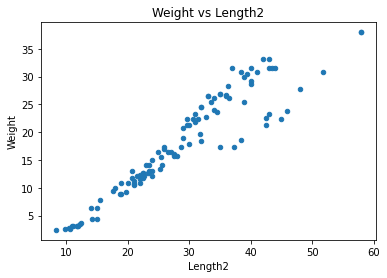

In [73]:
df.plot.scatter(x='Length2', y='Weight', title='Weight vs Length2')

### Homoscedasticity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

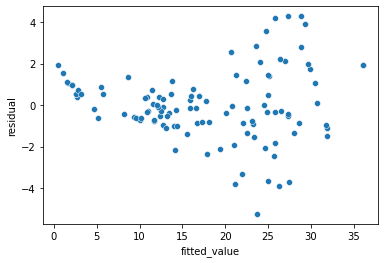

In [74]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

### Normality

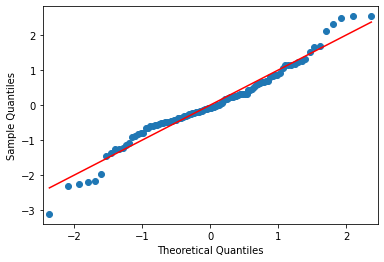

In [75]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

### Model Error are IID

<AxesSubplot:ylabel='Frequency'>

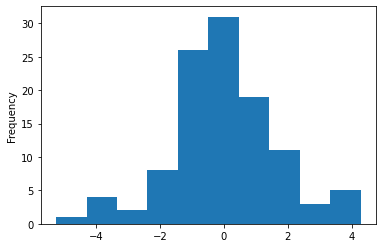

In [76]:
df['residual'].plot.hist()

## Prediction on Test Data

In [77]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Length1,Length2,Length3,Height,Width,Weight
78,16.8,18.7,19.4,5.1992,3.1234,8.831761
118,36.6,39.0,41.3,12.4313,7.3514,28.635642
28,32.8,36.0,41.6,16.8896,6.1984,29.154759
73,12.5,13.7,14.7,3.5280,1.9992,5.656854
65,18.4,20.0,22.4,8.8928,3.2928,12.247449


In [78]:
df_test['Prediction']=model3.predict(df_test) # predict = all row prediction ( Auto )
df_test.head(10)

,Length1,Length2,Length3,Height,Width,Weight,Prediction
78,16.8,18.7,19.4,5.1992,3.1234,8.831761,9.051712
118,36.6,39.0,41.3,12.4313,7.3514,28.635642,26.796765
28,32.8,36.0,41.6,16.8896,6.1984,29.154759,28.367928
73,12.5,13.7,14.7,3.5280,1.9992,5.656854,4.764550
65,18.4,20.0,22.4,8.8928,3.2928,12.247449,12.639154
11,28.7,31.0,36.2,14.3714,4.8146,22.360680,23.438119
102,25.2,27.3,28.7,8.3230,5.1373,17.320508,16.614811
120,37.0,40.0,42.5,11.7300,7.2250,30.000000,26.868498
22,31.5,34.5,39.7,15.5227,5.2801,24.899799,26.425065
36,16.5,18.2,20.3,5.2983,2.8217,8.306624,8.824986


## Above data is squareroot data, so change into original data

In [79]:
df_test['Prediction']=model3.predict(df_test) 
df_test['Original_Prediction']=df_test.Prediction**2
df_test['Original_Weight']=df_test.Weight**2
df_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Prediction,Original_Prediction,Original_Weight
78,16.8,18.7,19.4,5.1992,3.1234,8.831761,9.051712,81.933495,78.0
118,36.6,39.0,41.3,12.4313,7.3514,28.635642,26.796765,718.066626,820.0
28,32.8,36.0,41.6,16.8896,6.1984,29.154759,28.367928,804.739343,850.0
73,12.5,13.7,14.7,3.5280,1.9992,5.656854,4.764550,22.700939,32.0
65,18.4,20.0,22.4,8.8928,3.2928,12.247449,12.639154,159.748224,150.0


## Mean score of the model at 95% confidence interval?
By the Model mean score of the model at 95% confidence interval is between interval 0.025 and 0.975

and Upper Limit=-7.121 And Lower Limit=-5.248

## RMSE Value for Train Data

In [80]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(df['Weight'],df['fitted_value'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 1.69


## RMSE Value for Test Data

In [82]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(df_test['Weight'],df_test['Prediction'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 1.52
